[16.35980887428053, 2.4424302256857833, 1.0575375898310224, 13.834973709242563, 2.0150139701949947, 13.129527302145636, 13.571330443339498, 2.419995386606681, 13.927553578211855, 0.08555946249674008, 2.4547068689820617, 0.9669463740746855, 13.428880571050072, 3.180862088020233, 13.768087678234119, 13.281744870974794, 4.8145298372509675, 17.296312404769644, 16.66673556210809, 5.684341886080802e-14, 13.121745975904755, 4.982161120885748, 16.184259128733427, 1.181176423739706, 2.217713543996416, 6.292870556581258, 1.1546405297959395, 1.6729473545731584, 2.4039187421774404, 1.6457309548257728, 5.684341886080802e-14, 8.926573970054084, 1.837142372341957, 1.9400204705676174, 4.18438043694998, 2.308796456985642, 1.6843879870863059, 2.476068670119896, 1.791703474706216, 8.852383685420877, 9.055971126399495, 0.9134662659433992, 3.104684631975006, 3.690313447703626, 8.936732037724152, 76.70718669838415, 4.44571417068221, 2.704327406534235, 17.371638527185194, 2.219974865962432, 3.816831932438528

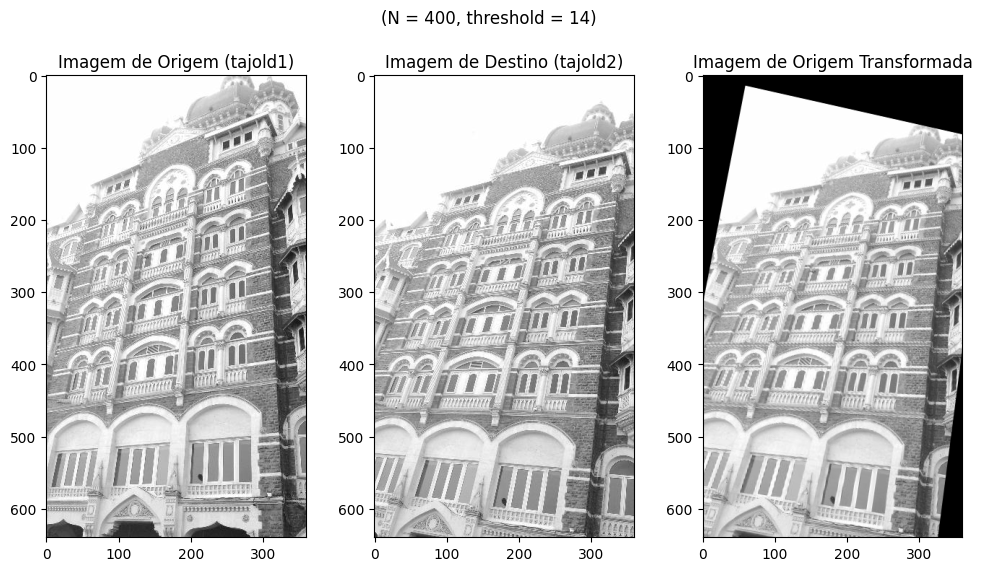

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from RANSAC import RANSAC


goi1 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/tajold1.jpg',cv2.IMREAD_GRAYSCALE)
goi2 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/tajold2.jpg',cv2.IMREAD_GRAYSCALE)


orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(goi1,None)
kp2, des2 = orb.detectAndCompute(goi2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

N = 400
t = 14

H, errors = RANSAC(N, t, matches, kp1, kp2)
print(errors)

# Apply homography
result_img = cv2.warpPerspective(goi1, H, (goi2.shape[1], goi2.shape[0]))


plt.figure(figsize=(12, 6))
plt.suptitle(f'(N = {N}, threshold = {t})',y=0.99)

plt.subplot(1, 3, 1)
plt.imshow(goi1, cmap='gray')
plt.title('Imagem de Origem (tajold1)')

plt.subplot(1, 3, 2)
plt.imshow(goi2, cmap='gray')
plt.title('Imagem de Destino (tajold2)')

plt.subplot(1, 3, 3)
plt.imshow(result_img, cmap='gray')
plt.title('Imagem de Origem Transformada')
plt.show()